In [1]:
import pandas as pd
import numpy as np

## Reading the files

In [2]:
train_df = pd.read_csv('emotion-labels-train.csv')
test_df = pd.read_csv('emotion-labels-test.csv')

In [3]:
train_df.head()

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy


In [4]:
test_df.head()

,text,label
0,You must be knowing #blithe means (adj.) Happ...,joy
1,Old saying 'A #smile shared is one gained for ...,joy
2,Bridget Jones' Baby was bloody hilarious 😅 #Br...,joy
3,@Elaminova sparkling water makes your life spa...,joy
4,I'm tired of everybody telling me to chill out...,joy


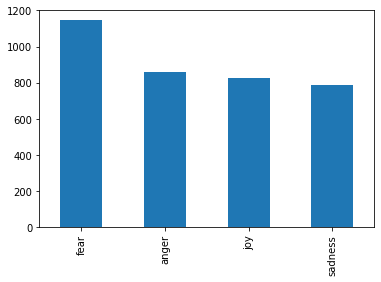

In [5]:
train_df.label.value_counts().plot(kind='bar')

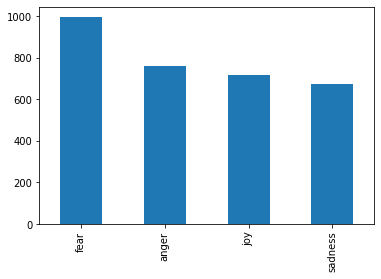

In [6]:
test_df.label.value_counts().plot(kind='bar')

In [7]:
train_df = train_df[train_df.label != 'anger']
train_df = train_df[train_df.label != 'fear']
test_df = test_df[test_df.label != 'anger']
test_df = test_df[test_df.label != 'fear']

In [8]:
train_df.shape,test_df.shape

((1609, 2), (1387, 2))

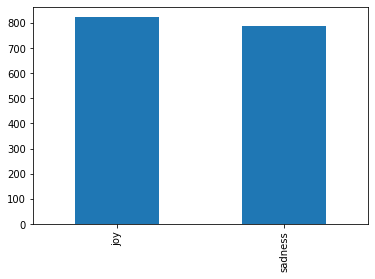

In [9]:
train_df.label.value_counts().plot(kind='bar')

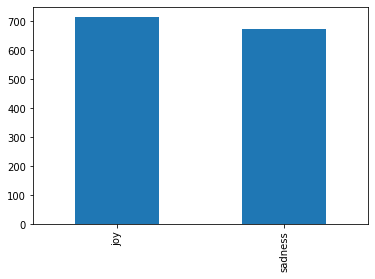

In [10]:
test_df.label.value_counts().plot(kind='bar')

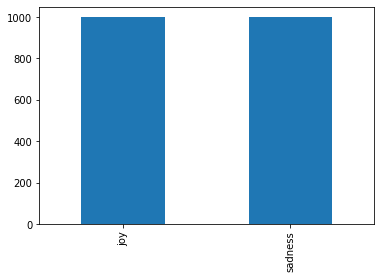

In [11]:
train_df = train_df.groupby('label', group_keys=False).apply(lambda x: x.sample(1000,replace=True))
train_df.label.value_counts().plot(kind='bar')

## Created Dataframe with Reviews and Labels

## Preprocessing Section

In [12]:
def label_encoding(label):
    if label=='joy':
        return '1'
    else :
        return '0'

In [13]:
train_df['label'] = train_df['label'].apply(label_encoding)

In [14]:
train_df.head()

,text,label
699,@musicfae15 [He grumbled as he sat atop the su...,1
100,I found #marmite in Australia. `:) #happy,1
711,"god, Facebook's design has started to remind m...",1
232,"God just replaced my sadness with laughter, ca...",1
291,"Knowing how to cook is invaluable, what's even...",1


In [15]:
test_df['label'] = test_df['label'].apply(label_encoding)

In [16]:
test_df.head()

,text,label
0,You must be knowing #blithe means (adj.) Happ...,1
1,Old saying 'A #smile shared is one gained for ...,1
2,Bridget Jones' Baby was bloody hilarious 😅 #Br...,1
3,@Elaminova sparkling water makes your life spa...,1
4,I'm tired of everybody telling me to chill out...,1


In [17]:
import re
def preprocess(text):
    text = text.replace("n\'t", " not")
    text = text.replace("n't", " not")
    text = text.replace("\'ve", " have")
    text = text.replace("\'m", " am")
    text = text.replace("\'re", " are")
    text = text.replace("\'s", " is")
    text = text.replace("\'ll", " will")
    text = " ".join(text.split())
    text = re.sub('[^A-Za-z0-9]+', ' ', text)
    text = " ".join(text.split())
    return text.lower()

In [18]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(sentence):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(sentence)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    return " ".join(filtered_sentence)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [19]:
print(set(stopwords.words('english')))

{'wasn', 'about', "wouldn't", 're', 'then', 'if', 'our', "hadn't", 'further', "needn't", 'of', 'didn', 'whom', 'so', 'down', 'herself', 'such', 'them', 'for', "you'd", 'been', 'they', 'between', "aren't", 'his', 'd', 'wouldn', 'while', 'an', 'have', 'll', 'you', 'it', 'on', 'him', 'i', 'mustn', 'theirs', 'there', 'we', "she's", "it's", 'your', "weren't", 'after', 'more', 'is', 'needn', 'doesn', 'through', 'here', "don't", 'until', "wasn't", 'm', 'themselves', 'what', 'other', 'does', 'its', 'to', 'below', 'from', 'no', 'not', 'own', "doesn't", 'because', "you've", 'shan', 'under', 'into', 'himself', 't', 'each', "didn't", 'which', 'in', 'same', 'yours', 'where', 'me', 'how', 'a', 'this', 'off', "mustn't", 'both', 'itself', 'or', 'was', 'myself', 'did', "you'll", 'mightn', 'be', 'why', 'above', 'yourself', 'are', 'few', 'were', 'hadn', 'hasn', 'has', 'ain', 'o', 'yourselves', 'nor', "shouldn't", 'all', 'with', "couldn't", 'before', 'she', 'any', 'hers', "won't", 'most', 've', 'these', '

In [20]:
train_df['text'] = train_df['text'].apply(preprocess)
train_df['text'].head()

699    musicfae15 he grumbled as he sat atop the sush...
100                   i found marmite in australia happy
711    god facebook is design has started to remind m...
232    god just replaced my sadness with laughter ca ...
291    knowing how to cook is invaluable what is even...
Name: text, dtype: object

In [21]:
test_df['text'] = test_df['text'].apply(preprocess)
test_df['text'].head()

0    you must be knowing blithe means adj happy che...
1    old saying a smile shared is one gained for an...
2    bridget jones baby was bloody hilarious bridge...
3    elaminova sparkling water makes your life sparkly
4    i am tired of everybody telling me to chill ou...
Name: text, dtype: object

In [22]:
train_df['text'] = train_df['text'].apply(remove_stopwords)
train_df['text'].head()

699    musicfae15 grumbled sat atop sushi bar stool c...
100                        found marmite australia happy
711    god facebook design started remind myspace heyday
232    god replaced sadness laughter ca go whole day sad
291    knowing cook invaluable even better even 400 s...
Name: text, dtype: object

In [23]:
test_df['text'] = test_df['text'].apply(remove_stopwords)
test_df['text'].head()

0         must knowing blithe means adj happy cheerful
1    old saying smile shared one gained another day...
2    bridget jones baby bloody hilarious bridgetjon...
3         elaminova sparkling water makes life sparkly
4    tired everybody telling chill everythings ok f...
Name: text, dtype: object

In [24]:
train_df.head()

,text,label
699,musicfae15 grumbled sat atop sushi bar stool c...,1
100,found marmite australia happy,1
711,god facebook design started remind myspace heyday,1
232,god replaced sadness laughter ca go whole day sad,1
291,knowing cook invaluable even better even 400 s...,1


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1,2),max_features=5000)
tfidf.fit(train_df['text'])
train_tfidf = tfidf.transform(train_df['text'])
test_tfidf = tfidf.transform(test_df['text'])

In [26]:
train_tfidf.shape,test_tfidf.shape

((2000, 5000), (1387, 5000))

In [27]:
print(tfidf.get_feature_names()[100:140])

['affliction', 'afghanistan', 'afghanistan etc', 'afl', 'afraid', 'afraid leave', 'afraid stop', 'age', 'ages', 'ago', 'ago met', 'ago preparing', 'ago seen', 'agreed', 'agreed memphis', 'ahead', 'ahead polls', 'ai', 'air', 'air nmy', 'aja', 'aja ngood', 'ak47', 'ak47 leave', 'aldubqc', 'aldubqc glad', 'alive', 'alive blessed', 'almost', 'almost car', 'almost passed', 'alone', 'alone end', 'along', 'along adventure', 'alot', 'alot interested', 'already', 'also', 'also escape']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_tfidf, train_df['label'], test_size=0.2, stratify=train_df['label'],random_state=20)

In [29]:
model_name = []
train_accuracies = []
val_accuracies = []
test_accuracies = []

## Multinomial Naive Bayes Model

In [30]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

## Prediction of Probabilities

In [31]:
train_probabilities = clf.predict_proba(X_train)[:,1]
val_probabilities = clf.predict_proba(X_val)[:,1]

In [32]:
train_probabilities[:10]

array([0.81936008, 0.12349335, 0.14915856, 0.86700408, 0.93379702,
       0.07119235, 0.81386777, 0.68873553, 0.99967563, 0.22475467])

In [33]:
val_probabilities[:10]

array([0.76652751, 0.89015835, 0.72467388, 0.11362077, 0.6306437 ,
       0.94643446, 0.70268901, 0.24797234, 0.98507029, 0.39591741])

## Prediction of log probabilities

In [34]:
train_log_probabilities = clf.predict_log_proba(X_train)[:,1]
val_log_probabilities = clf.predict_log_proba(X_val)[:,1]

In [35]:
train_log_probabilities[:10]

array([-1.99231633e-01, -2.09156795e+00, -1.90274541e+00, -1.42711600e-01,
       -6.84961840e-02, -2.64236989e+00, -2.05957374e-01, -3.72897924e-01,
       -3.24420236e-04, -1.49274583e+00])

In [36]:
val_log_probabilities[:10]

array([-0.2658847 , -0.11635591, -0.32203355, -2.17488892, -0.46101423,
       -0.05505356, -0.35284085, -1.39443806, -0.01504228, -0.92654964])

## Prediction of labels

In [37]:
predicted_train = clf.predict(X_train)
predicted_val = clf.predict(X_val)

## Accuracy Score

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score

print("The Train accuracy for the model Multinomial Naive Bayes is : ",accuracy_score(y_train,predicted_train))
print("The Validation accuracy for the model Multinomial Naive Bayes is : ",accuracy_score(y_val,predicted_val))

The Train accuracy for the model Multinomial Naive Bayes is :  0.99125
The Validation accuracy for the model Multinomial Naive Bayes is :  0.96


## Plotting Confusion Matrix

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(cf_matrix,title):
    sns.heatmap(cf_matrix, annot=True,fmt='g',cmap="Blues",xticklabels=["negative","positive"],yticklabels=["negative","positive"])
    plt.title(title)
    plt.show()

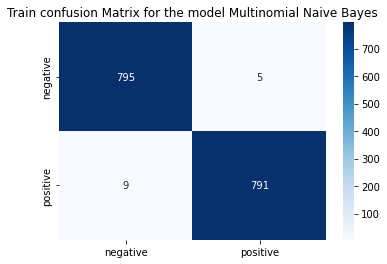

In [40]:
plot_confusion_matrix(confusion_matrix(y_train,predicted_train),"Train confusion Matrix for the model Multinomial Naive Bayes")

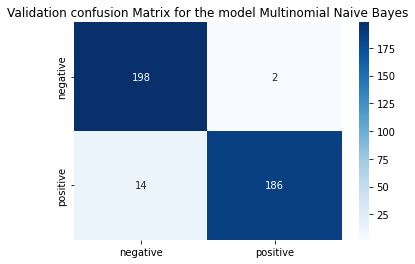

In [41]:
plot_confusion_matrix(confusion_matrix(y_val,predicted_val),"Validation confusion Matrix for the model Multinomial Naive Bayes")

In [42]:
testset_predicted = clf.predict(test_tfidf)

In [43]:
actual = test_df.label.values
actual

array(['1', '1', '1', ..., '0', '0', '0'], dtype=object)

In [44]:
print("The testset accuracy for the model Multinomial Naive Bayes is : ",accuracy_score(actual,testset_predicted))

The testset accuracy for the model Multinomial Naive Bayes is :  0.8918529199711608


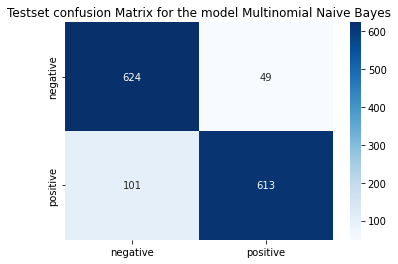

In [45]:
plot_confusion_matrix(confusion_matrix(actual,testset_predicted),"Testset confusion Matrix for the model Multinomial Naive Bayes")

In [46]:
model_name.append("Multinomial Naive Bayes")
train_accuracies.append(np.round(accuracy_score(y_train,predicted_train),2))
val_accuracies.append(np.round(accuracy_score(y_val,predicted_val),2))
test_accuracies.append(np.round(accuracy_score(actual,testset_predicted),2))

## Multinomial Naive Bayes with Cross Validation Using Grid SearchCV

In [47]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

params = {'alpha':[0.001,0.01,0.1,1,10,100]}
cv = GridSearchCV(clf, params, cv=10, scoring='accuracy', return_train_score=True)
cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='accuracy')

In [48]:
predicted_train = cv.predict(X_train)
predicted_val = cv.predict(X_val)

## Accuracy Score

In [49]:
print("The Train accuracy for the cross-validated Multinomial Naive Bayes is : ",accuracy_score(y_train,predicted_train))
print("The Validation accuracy for the cross-validated Multinomial Naive Bayes is : ",accuracy_score(y_val,predicted_val))

The Train accuracy for the cross-validated Multinomial Naive Bayes is :  0.99125
The Validation accuracy for the cross-validated Multinomial Naive Bayes is :  0.96


## Plotting Confusion Matrix


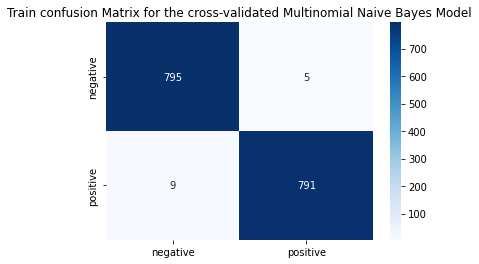

In [50]:
plot_confusion_matrix(confusion_matrix(y_train,predicted_train),"Train confusion Matrix for the cross-validated Multinomial Naive Bayes Model")

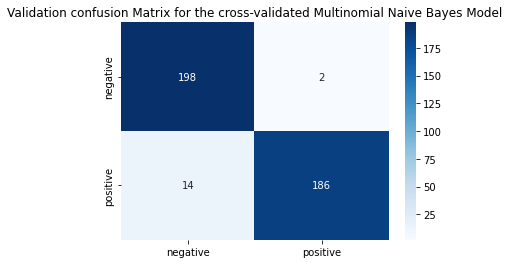

In [51]:
plot_confusion_matrix(confusion_matrix(y_val,predicted_val),"Validation confusion Matrix for the cross-validated Multinomial Naive Bayes Model")

## Test Datset Prediction

In [52]:
testset_predicted = cv.predict(test_tfidf)

In [53]:
print("The testset accuracy for the model Multinomial Naive Bayes with cross-validtion is: ",accuracy_score(actual,testset_predicted))

The testset accuracy for the model Multinomial Naive Bayes with cross-validtion is:  0.8918529199711608


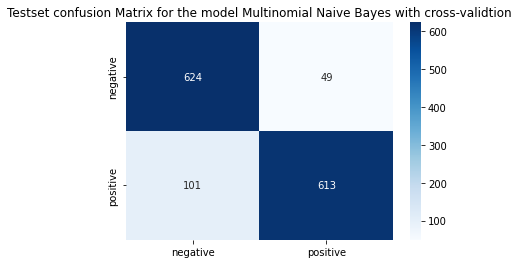

In [54]:
plot_confusion_matrix(confusion_matrix(actual,testset_predicted),"Testset confusion Matrix for the model Multinomial Naive Bayes with cross-validtion")

In [55]:
model_name.append("Multinomial Naive Bayes with Cross Validation")
train_accuracies.append(np.round(accuracy_score(y_train,predicted_train),4))
val_accuracies.append(np.round(accuracy_score(y_val,predicted_val),4))
test_accuracies.append(np.round(accuracy_score(actual,testset_predicted),4))

## Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.1)
lr.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [57]:
predicted_train = lr.predict(X_train)
predicted_val = lr.predict(X_val)

In [58]:
print("The Train accuracy for Logistic Regression model is : ",accuracy_score(y_train,predicted_train))
print("The Validation accuracy for Logistic Regression model is : ",accuracy_score(y_val,predicted_val))

The Train accuracy for Logistic Regression model is :  0.978125
The Validation accuracy for Logistic Regression model is :  0.9225


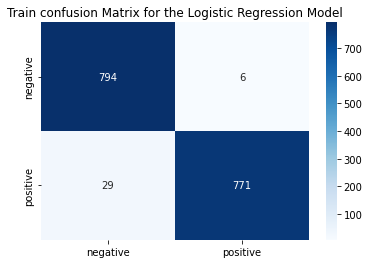

In [59]:
plot_confusion_matrix(confusion_matrix(y_train,predicted_train),"Train confusion Matrix for the Logistic Regression Model")

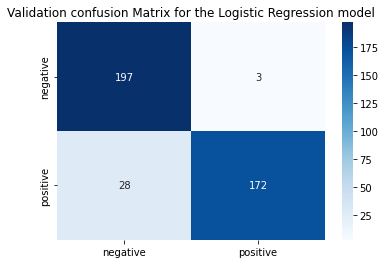

In [60]:
plot_confusion_matrix(confusion_matrix(y_val,predicted_val),"Validation confusion Matrix for the Logistic Regression model")

In [61]:
testset_predicted = lr.predict(test_tfidf)

In [62]:
print("The testset accuracy for the model Logistic Regression is: ",accuracy_score(actual,testset_predicted))

The testset accuracy for the model Logistic Regression is:  0.8839221341023792


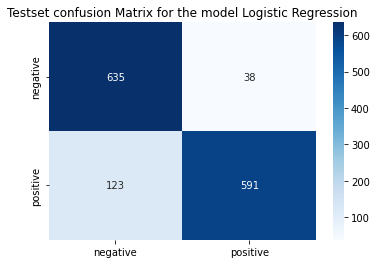

In [63]:
plot_confusion_matrix(confusion_matrix(actual,testset_predicted),"Testset confusion Matrix for the model Logistic Regression")

In [64]:
model_name.append("Logistic Regression")
train_accuracies.append(np.round(accuracy_score(y_train,predicted_train),4))
val_accuracies.append(np.round(accuracy_score(y_val,predicted_val),4))
test_accuracies.append(np.round(accuracy_score(actual,testset_predicted),4))

## Logistic Regression with cross validation using GridSearchCv

In [65]:
grid_values = {'C': [0.001,0.01,0.1,1,10,100]}
cv = GridSearchCV(LogisticRegression(max_iter=250), param_grid=grid_values,cv=5, scoring='accuracy', return_train_score=True)
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=250),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='accuracy')

In [66]:
predicted_train = cv.predict(X_train)
predicted_val = cv.predict(X_val)

In [67]:
print("The Train accuracy for the cross-validated Logistic Regression model is : ",accuracy_score(y_train,predicted_train))
print("The Validation accuracy for the cross-validated Logistic Regression model is : ",accuracy_score(y_val,predicted_val))

The Train accuracy for the cross-validated Logistic Regression model is :  0.999375
The Validation accuracy for the cross-validated Logistic Regression model is :  0.975


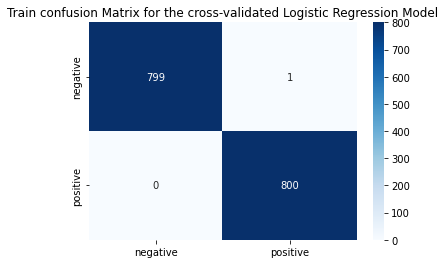

In [68]:
plot_confusion_matrix(confusion_matrix(y_train,predicted_train),"Train confusion Matrix for the cross-validated Logistic Regression Model")

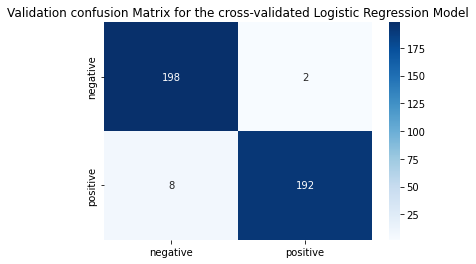

In [69]:
plot_confusion_matrix(confusion_matrix(y_val,predicted_val),"Validation confusion Matrix for the cross-validated Logistic Regression Model")

In [70]:
testset_predicted = cv.predict(test_tfidf)
print("The testset accuracy for cross-validated Logistic Regression Model is : ",accuracy_score(actual,testset_predicted))

The testset accuracy for cross-validated Logistic Regression Model is :  0.9206921413121846


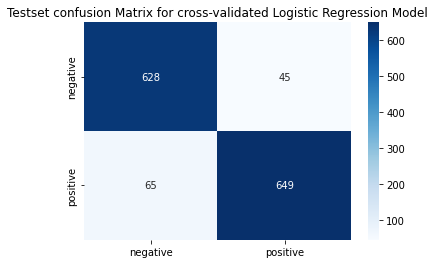

In [71]:
plot_confusion_matrix(confusion_matrix(actual,testset_predicted),"Testset confusion Matrix for cross-validated Logistic Regression Model")

In [72]:
model_name.append("Logistic Regression with Cross Validation")
train_accuracies.append(np.round(accuracy_score(y_train,predicted_train),4))
val_accuracies.append(np.round(accuracy_score(y_val,predicted_val),4))
test_accuracies.append(np.round(accuracy_score(actual,testset_predicted),4))

## K-Nearest Neighbours

In [73]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [74]:
predicted_train = knn.predict(X_train)
predicted_val = knn.predict(X_val)

In [75]:
print("The Train accuracy for the KNN model is : ",accuracy_score(y_train,predicted_train))
print("The Validation accuracy for the KNN model is : ",accuracy_score(y_val,predicted_val))

The Train accuracy for the KNN model is :  0.859375
The Validation accuracy for the KNN model is :  0.6675


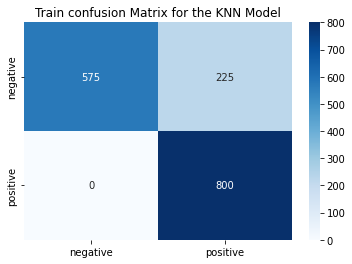

In [76]:
plot_confusion_matrix(confusion_matrix(y_train,predicted_train),"Train confusion Matrix for the KNN Model")

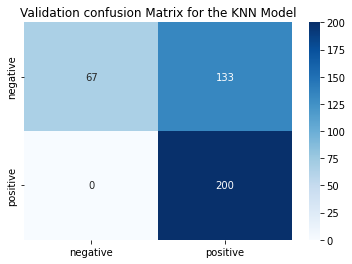

In [77]:
plot_confusion_matrix(confusion_matrix(y_val,predicted_val),"Validation confusion Matrix for the KNN Model")

In [78]:
testset_predicted = knn.predict(test_tfidf)
print("The testset accuracy KNN model is : ",accuracy_score(actual,testset_predicted))

The testset accuracy KNN model is :  0.5436193222782985


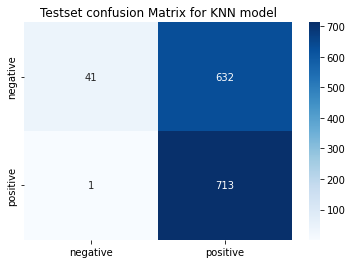

In [79]:
plot_confusion_matrix(confusion_matrix(actual,testset_predicted),"Testset confusion Matrix for KNN model")

In [80]:
model_name.append("KNN-Classifier")
train_accuracies.append(np.round(accuracy_score(y_train,predicted_train),4))
val_accuracies.append(np.round(accuracy_score(y_val,predicted_val),4))
test_accuracies.append(np.round(accuracy_score(actual,testset_predicted),4))

## K-Nearest Neighbours using Cross-Validation

In [81]:
params = {'n_neighbors':[3,5,7,9,11]}
cv = GridSearchCV(KNeighborsClassifier(), params, cv=5, scoring='accuracy', return_train_score=True)
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]},
             return_train_score=True, scoring='accuracy')

In [82]:
predicted_train = cv.predict(X_train)
predicted_val = cv.predict(X_val)

In [83]:
print("The Train accuracy for the cross-validated KNN model is : ",accuracy_score(y_train,predicted_train))
print("The Validation accuracy for the cross-validated KNN model is : ",accuracy_score(y_val,predicted_val))

The Train accuracy for the cross-validated KNN model is :  0.915
The Validation accuracy for the cross-validated KNN model is :  0.835


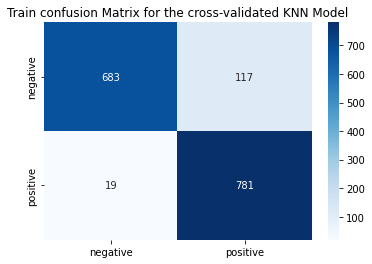

In [84]:
plot_confusion_matrix(confusion_matrix(y_train,predicted_train),"Train confusion Matrix for the cross-validated KNN Model")

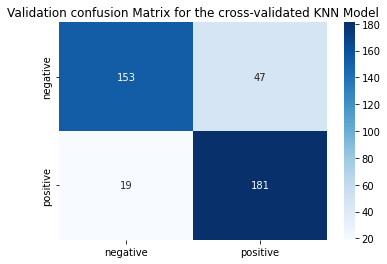

In [85]:
plot_confusion_matrix(confusion_matrix(y_val,predicted_val),"Validation confusion Matrix for the cross-validated KNN Model")

In [86]:
testset_predicted = cv.predict(test_tfidf)
print("The testset accuracy for the Cross-Validated KNN model is : ",accuracy_score(actual,testset_predicted))

The testset accuracy for the Cross-Validated KNN model is :  0.8038932948810382


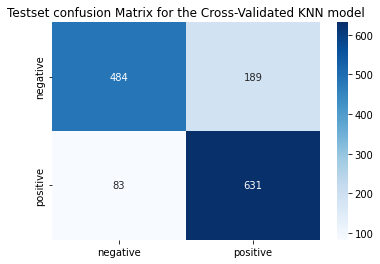

In [87]:
plot_confusion_matrix(confusion_matrix(actual,testset_predicted),"Testset confusion Matrix for the Cross-Validated KNN model")

In [88]:
model_name.append("KNN-Classifier with Cross-Validation")
train_accuracies.append(np.round(accuracy_score(y_train,predicted_train),4))
val_accuracies.append(np.round(accuracy_score(y_val,predicted_val),4))
test_accuracies.append(np.round(accuracy_score(actual,testset_predicted),4))

## Support Vector Machine Classifier (SVM)

In [89]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [90]:
predicted_train = svc.predict(X_train)
predicted_val = svc.predict(X_val)

In [91]:
print("The Train accuracy for the SVC classifier is : ",accuracy_score(y_train,predicted_train))
print("The Validation accuracy for the SVC classifier is : ",accuracy_score(y_val,predicted_val))

The Train accuracy for the SVC classifier is :  0.999375
The Validation accuracy for the SVC classifier is :  0.9675


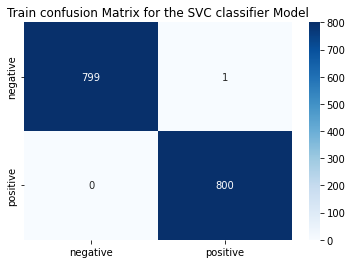

In [92]:
plot_confusion_matrix(confusion_matrix(y_train,predicted_train),"Train confusion Matrix for the SVC classifier Model")

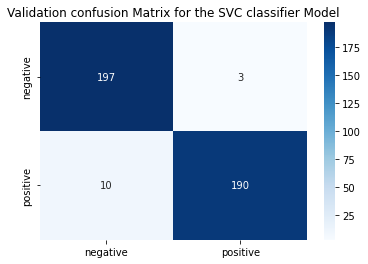

In [93]:
plot_confusion_matrix(confusion_matrix(y_val,predicted_val),"Validation confusion Matrix for the SVC classifier Model")

In [94]:
testset_predicted = svc.predict(test_tfidf)
print("The testset accuracy for the SVC classifier is is : ",accuracy_score(actual,testset_predicted))

The testset accuracy for the SVC classifier is is :  0.9149242970439798


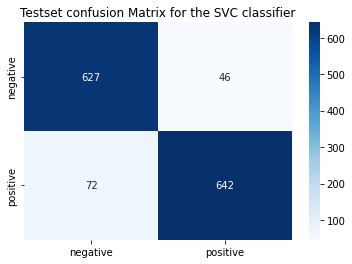

In [95]:
plot_confusion_matrix(confusion_matrix(actual,testset_predicted),"Testset confusion Matrix for the SVC classifier")

In [96]:
model_name.append("SVM-Classifier")
train_accuracies.append(np.round(accuracy_score(y_train,predicted_train),4))
val_accuracies.append(np.round(accuracy_score(y_val,predicted_val),4))
test_accuracies.append(np.round(accuracy_score(actual,testset_predicted),4))

## SVM Classifier with cross validation

In [97]:
clf = SVC()
param = [{'C': [10**-2, 10**-1, 10**0, 10**1, 10**2], 'gamma':[0.01, 0.1, 1, 10]}]

cv = GridSearchCV(clf, param,cv=5, scoring='accuracy', return_train_score=True)
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': [0.01, 0.1, 1, 10]}],
             return_train_score=True, scoring='accuracy')

In [98]:
predicted_train = cv.predict(X_train)
predicted_val = cv.predict(X_val)

In [99]:
print("The Train accuracy for the cross-validated SVC classifier is : ",accuracy_score(y_train,predicted_train))
print("The Validation accuracy for the cross-validated SVC classifier is : ",accuracy_score(y_val,predicted_val))

The Train accuracy for the cross-validated SVC classifier is :  0.999375
The Validation accuracy for the cross-validated SVC classifier is :  0.9775


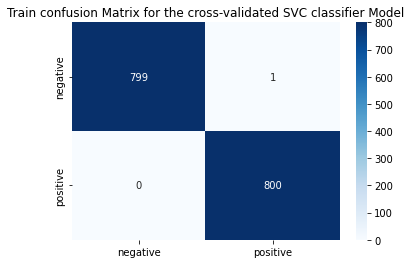

In [100]:
plot_confusion_matrix(confusion_matrix(y_train,predicted_train),"Train confusion Matrix for the cross-validated SVC classifier Model")

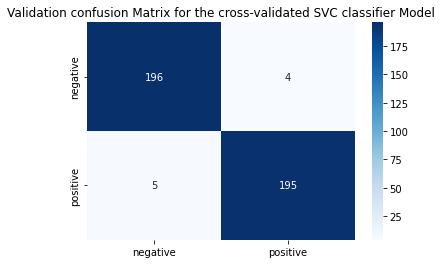

In [101]:
plot_confusion_matrix(confusion_matrix(y_val,predicted_val),"Validation confusion Matrix for the cross-validated SVC classifier Model")

In [102]:
testset_predicted = cv.predict(test_tfidf)
print("The testset accuracy score for the Cross-Validated SVC classifier model is : ",accuracy_score(actual,testset_predicted))

The testset accuracy score for the Cross-Validated SVC classifier model is :  0.9156452775775054


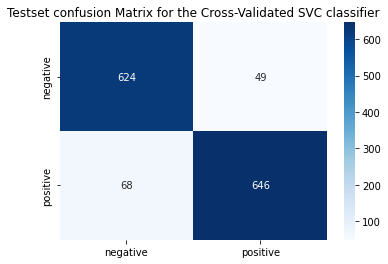

In [103]:
plot_confusion_matrix(confusion_matrix(actual,testset_predicted),"Testset confusion Matrix for the Cross-Validated SVC classifier")

In [104]:
model_name.append("SVM-Classifier with Cross Validation")
train_accuracies.append(np.round(accuracy_score(y_train,predicted_train),4))
val_accuracies.append(np.round(accuracy_score(y_val,predicted_val),4))
test_accuracies.append(np.round(accuracy_score(actual,testset_predicted),4))

## Decision Trees

In [105]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [106]:
predicted_train = clf.predict(X_train)
predicted_val = clf.predict(X_val)

In [107]:
print("The Train accuracy for the Decision Trees classifier Model is : ",accuracy_score(y_train,predicted_train))
print("The Validation accuracy for the Decision Trees classifier Model is : ",accuracy_score(y_val,predicted_val))

The Train accuracy for the Decision Trees classifier Model is :  0.999375
The Validation accuracy for the Decision Trees classifier Model is :  0.95


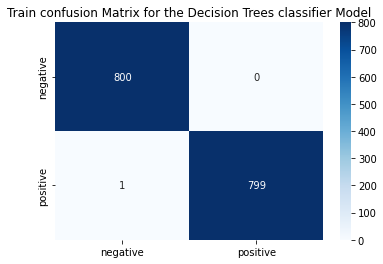

In [108]:
plot_confusion_matrix(confusion_matrix(y_train,predicted_train),"Train confusion Matrix for the Decision Trees classifier Model")

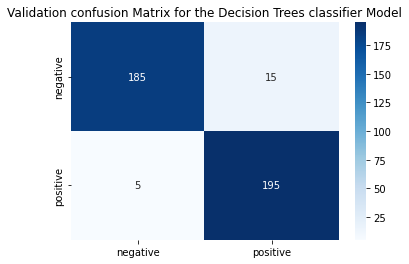

In [109]:
plot_confusion_matrix(confusion_matrix(y_val,predicted_val),"Validation confusion Matrix for the Decision Trees classifier Model")

In [110]:
testset_predicted = clf.predict(test_tfidf)
print("The testset accuracy score for the Decision Trees classifier Model is : ",accuracy_score(actual,testset_predicted))

The testset accuracy score for the Decision Trees classifier Model is :  0.8983417447728911


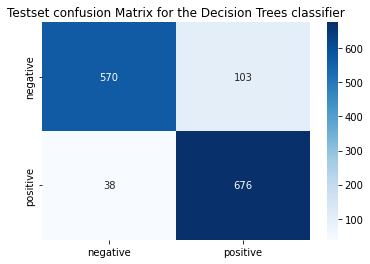

In [111]:
plot_confusion_matrix(confusion_matrix(actual,testset_predicted),"Testset confusion Matrix for the Decision Trees classifier")

In [112]:
model_name.append("Decision Trees Classifier")
train_accuracies.append(np.round(accuracy_score(y_train,predicted_train),4))
val_accuracies.append(np.round(accuracy_score(y_val,predicted_val),4))
test_accuracies.append(np.round(accuracy_score(actual,testset_predicted),4))

# Ensemble Models

## Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=300)

clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [114]:
predicted_train = clf.predict(X_train)
predicted_val = clf.predict(X_val)

In [115]:
print("The Train accuracy for the Random Forest classifier Model is : ",accuracy_score(y_train,predicted_train))
print("The Validation accuracy for the Random Forest classifier Model is : ",accuracy_score(y_val,predicted_val))

The Train accuracy for the Random Forest classifier Model is :  0.999375
The Validation accuracy for the Random Forest classifier Model is :  0.9625


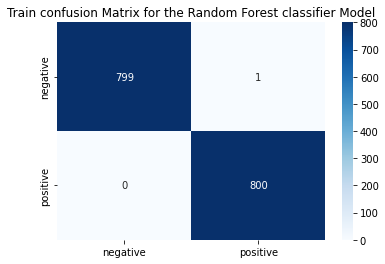

In [116]:
plot_confusion_matrix(confusion_matrix(y_train,predicted_train),"Train confusion Matrix for the Random Forest classifier Model")

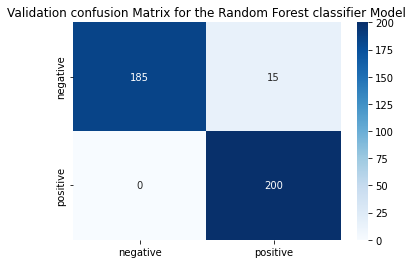

In [117]:
plot_confusion_matrix(confusion_matrix(y_val,predicted_val),"Validation confusion Matrix for the Random Forest classifier Model")

In [118]:
testset_predicted = clf.predict(test_tfidf)
print("The testset accuracy for the Random Forest classifier model is : ",accuracy_score(actual,testset_predicted))

The testset accuracy for the Random Forest classifier model is :  0.9134823359769286


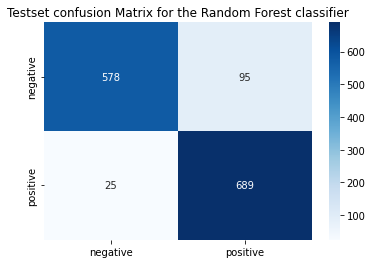

In [119]:
plot_confusion_matrix(confusion_matrix(actual,testset_predicted),"Testset confusion Matrix for the Random Forest classifier")

In [120]:
model_name.append("Random Forest Classifier")
train_accuracies.append(np.round(accuracy_score(y_train,predicted_train),4))
val_accuracies.append(np.round(accuracy_score(y_val,predicted_val),4))
test_accuracies.append(np.round(accuracy_score(actual,testset_predicted),4))

## Accuracy

In [121]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Model", "Train Accuracy Score", "Validation Accuracy Score", "Test Accuracy Score"]

for i in range(len(model_name)):
    x.add_row([model_name[i],train_accuracies[i],val_accuracies[i],test_accuracies[i]])

In [122]:
print(x)

+-----------------------------------------------+----------------------+---------------------------+---------------------+
|                     Model                     | Train Accuracy Score | Validation Accuracy Score | Test Accuracy Score |
+-----------------------------------------------+----------------------+---------------------------+---------------------+
|            Multinomial Naive Bayes            |         0.99         |            0.96           |         0.89        |
| Multinomial Naive Bayes with Cross Validation |        0.9912        |            0.96           |        0.8919       |
|              Logistic Regression              |        0.9781        |           0.9225          |        0.8839       |
|   Logistic Regression with Cross Validation   |        0.9994        |           0.975           |        0.9207       |
|                 KNN-Classifier                |        0.8594        |           0.6675          |        0.5436       |
|      KNN-Class

From above we can observe that Logistic Regression with Cross Validation model has the highest accuracy to detect the emotion of the text. We have we have integrated the concepts of sentiment analysis and text classification in this project. 